<a href="https://colab.research.google.com/github/guindo/fastaiproject/blob/main/plant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 6.9MB/s 
     |████████████████████████████████| 204kB 13.9MB/s 
     |████████████████████████████████| 1.2MB 13.8MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
Mounted at /content/gdrive


In [3]:
from fastbook import *
from fastai.vision.widgets import *

In [4]:
import fastbook
fastbook.setup_book()

In [5]:
from fastbook import *
from fastai.vision.widgets import *

In [6]:
from pathlib import Path

root = Path().cwd()/"/content/drive/MyDrive/Collab Code/Data/Plant_images_pianalytix/"


DUCK

In [ ]:
from jmd_imagescraper.core import *
duckduckgo_search(root, "orangutan" ,"orangutan", max_results=300)

In [ ]:
from jmd_imagescraper.imagecleaner import *

display_image_cleaner(root)

MOUNT

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
from fastai.vision.all import *
from fastai.imports import *
root_dir = "/content/drive/MyDrive/Collab Code/Data/"
destination = Path(root_dir + '/Plant_images_pianalytix')
path = destination

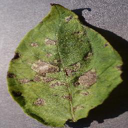

In [9]:
# make a list of all images of monkey
list_Potato___Early_blightla = [f for f in (path / 'Potato___Early_blight').iterdir() if f.is_file()]
list_Potato___Early_blightla
# pick one and show it
picked_image = 3

im = Image.open(list_Potato___Early_blightla[picked_image])
im.to_thumb(128,128)

In [10]:
fns = get_image_files(path)
fns

(#955) [Path('/content/drive/MyDrive/Collab Code/Data/Plant_images_pianalytix/Potato___Early_blight/d1b4cb77-db0e-42db-b1c0-25d222844241___RS_Early.B 7130 (1).JPG'),Path('/content/drive/MyDrive/Collab Code/Data/Plant_images_pianalytix/Potato___Early_blight/c82e587c-a0f2-451e-9057-e3719a3d9562___RS_Early.B 6824.JPG'),Path('/content/drive/MyDrive/Collab Code/Data/Plant_images_pianalytix/Potato___Early_blight/cceeec9d-e0d9-4512-a1f0-faa5dc6bbf40___RS_Early.B 8381.JPG'),Path('/content/drive/MyDrive/Collab Code/Data/Plant_images_pianalytix/Potato___Early_blight/d9a1cd5f-e2f2-49f7-b5f1-22cf02eb5ba4___RS_Early.B 8891.JPG'),Path('/content/drive/MyDrive/Collab Code/Data/Plant_images_pianalytix/Potato___Early_blight/c9bff7de-c589-4ed2-92fe-cd9ca2a1df16___RS_Early.B 7846.JPG'),Path('/content/drive/MyDrive/Collab Code/Data/Plant_images_pianalytix/Potato___Early_blight/d825093a-2bd7-458d-a9a1-036db6c08dec___RS_Early.B 9018.JPG'),Path('/content/drive/MyDrive/Collab Code/Data/Plant_images_pianalytix/

In [11]:
failed = verify_images(fns)
failed

(#0) []

In [12]:
#create datablock
datafast = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.4, seed=2),
    get_y=parent_label,
    item_tfms=Resize(128))

In [13]:
dls = datafast.dataloaders(path)

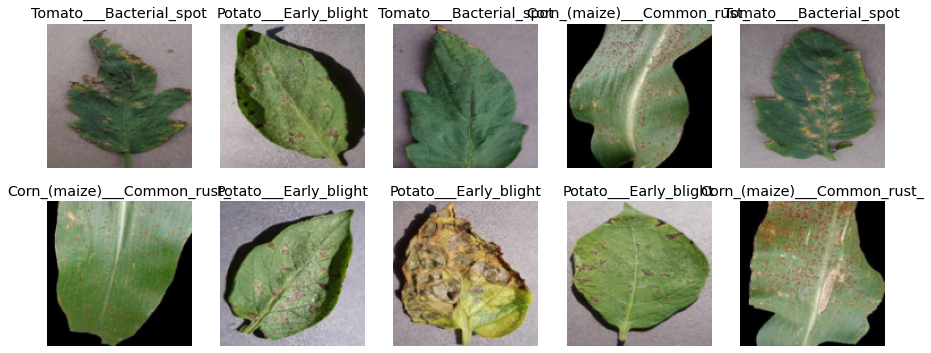

In [14]:
dls.valid.show_batch(max_n=10, nrows=2)

In [15]:
#create datablock
datafast = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.4, seed=2),
    get_y=parent_label,
    item_tfms=Resize(128)

SyntaxError: ignored

In [16]:
datafast = datafast.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.),
    batch_tfms=aug_transforms(mult=2))
dls = datafast.dataloaders(path,num_workers=0)

In [18]:
learn = cnn_learner(dls, resnet18, metrics=[error_rate,accuracy])
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.225183,0.246660,0.102094,0.897906,01:40


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.278014,0.017837,0.005236,0.994764,02:05


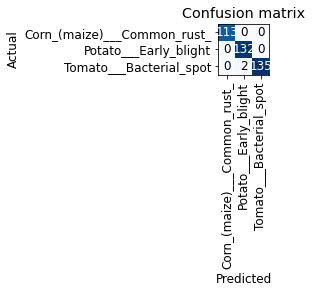

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

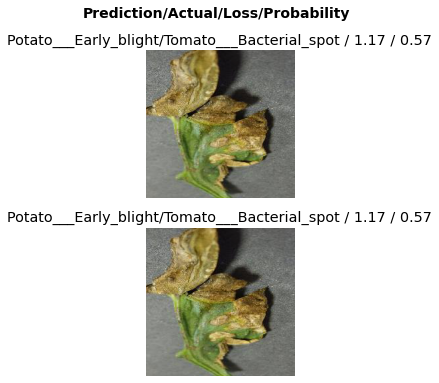

In [20]:
interp.plot_top_losses(2, nrows=2)

In [21]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

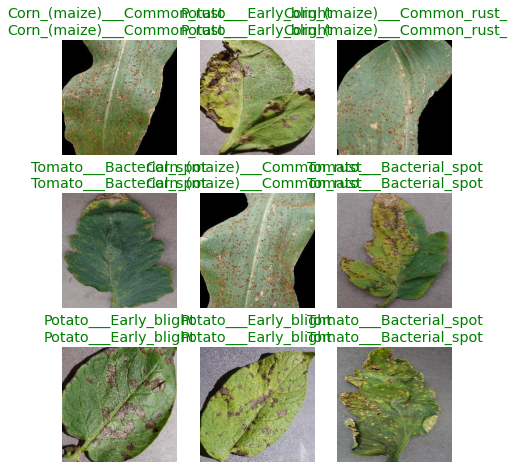

In [22]:
learn.show_results(max_n=9, figsize=(7,8))

In [ ]:
learn.export()

In [ ]:
learn.save("/content/drive/MyDrive/Collab Code/Data/plant_disease.h5")
# serialize model to json
json_model = learn.to_json()
#save the model architecture to JSON file
with open('/content/drive/MyDrive/Collab Code/Data/plant_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
learn.save_weights('/content/drive/MyDrive/Collab Code/Data/plant_model_weights.h5')

In [ ]:
learn_inf = load_learner('export.pkl')

In [ ]:
learn_inf.predict('/content/drive/MyDrive/Unknown.jpg')

In [ ]:
learn_inf.dls.vocab